<a href="https://colab.research.google.com/github/Adedotun-Adepoju/Hamoye-codes/blob/master/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip drive/"My Drive"/Hamoye/"Stage E"/household_power_consumption.zip -d drive/"My Drive"/Hamoye/"Stage E"

Archive:  drive/My Drive/Hamoye/Stage E/household_power_consumption.zip
  inflating: drive/My Drive/Hamoye/Stage E/household_power_consumption.txt  


In [24]:

!cp '/content/drive/My Drive/household_power_consumption.txt' '/content/'

In [46]:
# Read the txt file
df_1 = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]})
df_1.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [47]:
# Make the datetime column the index
df_1.set_index('datetime', inplace=True)
df_1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [48]:
# check if they are missing values
df_1.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [49]:
# checking for null values indicated by another symbol
null_value = 0
for values in df_1.values.tolist():
    for value in values:
        if value == '?':
            null_value += 1
        else:
            continue

print('Total no of null values are: ', null_value)

Total no of null values are:  155874


In [50]:
# replacing ? with nan
df_1.replace('?', np.nan, inplace=True) 

In [52]:
# to check if there are missing values in each column 
df_1.isnull().any()

Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool

In [53]:
# To check the number of missing values in each column
df_1.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [57]:
# Selecting the object datatypes to convert them to float
df_1.select_dtypes(include=['object']).columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'],
      dtype='object')

In [58]:
#using a loop to convert the object datatype columns to float
for column in df_1.select_dtypes(include=['object']).columns:
        df_1[column] = df_1[column].astype('float')

In [61]:
# checking the datatypes
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [62]:
# filling the null values with the mean of each column
df_1 = df_1.fillna({'Global_active_power':df_1['Global_active_power'].mean(), 'Global_reactive_power':df_1['Global_reactive_power'].mean(),
           'Voltage':df_1['Voltage'].mean(), 'Global_intensity':df_1['Global_intensity'].mean(),
           'Sub_metering_1':df_1['Sub_metering_1'].mean(), 'Sub_metering_2':df_1['Sub_metering_2'].mean(),
           'Sub_metering_3':df_1['Sub_metering_3'].mean()})

In [63]:
# create a copy of the data
new_df = df_1.copy()

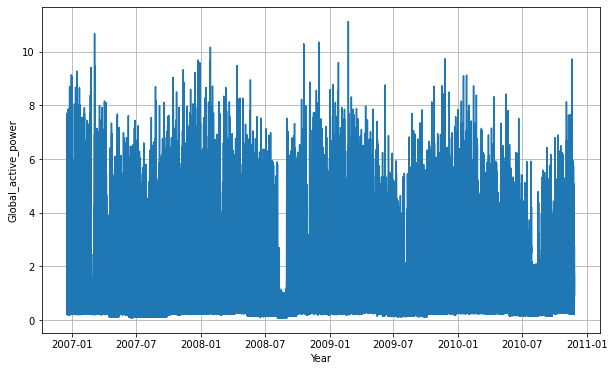

In [65]:
# plot to visualize the series using 'Global_active_power' column
plt.figure(figsize=(10,6))
plt.plot(new_df.index, new_df['Global_active_power'], '-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

###Downsampling the data to daily timeframe

In [66]:
# downsampling to daily basis
new_df_daily = new_df.resample('D').sum()

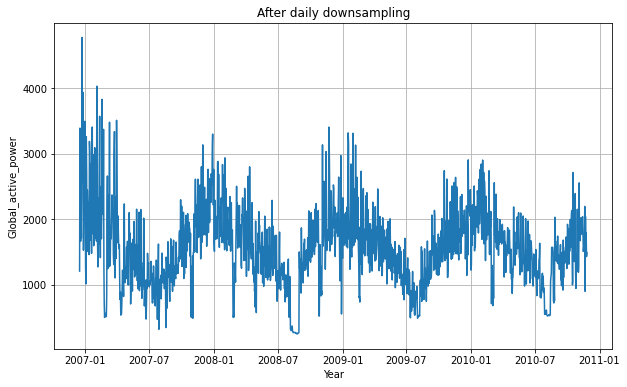

In [68]:
# plot after daily downsampling of 'Global_active_power' over time
plt.figure(figsize=(10,6))
plt.plot(new_df_daily.index, new_df_daily['Global_active_power'], '-')
plt.grid()
plt.title('After daily downsampling')
plt.xlabel('Year')
plt.ylabel('Global_active_power')
plt.show()

In [69]:
print('no of observations after daily downsampling is {}'.format(len(new_df_daily)))

no of observations after daily downsampling is 1442


In [70]:
# USING THE DOWNSAMPLED DAILY DATA
gap = new_df_daily['Global_active_power']
grp = new_df_daily['Global_reactive_power']

In [74]:
# to calculate Pearson's correlation
corr=gap.corr(grp).round(2)
print('Pearsons correlation is {}'.format(corr))

Pearsons correlation is 0.04


In [75]:
# USING THE ORIGINAL DATA
ga = new_df['Global_active_power']
gr = new_df['Global_reactive_power']

In [77]:
# to calculate Pearson's correlation with the original data
corr_1=ga.corr(gr).round(2)
print('Pearsons correlation is {}'.format(corr_1))

Pearsons correlation is 0.25


In [81]:
# USING THE DOWNSAMPLED DAILY DATA
volt = new_df_daily['Voltage']
inte = new_df_daily['Global_intensity']

In [82]:
# to calculate Pearson's correlation
corr_2=volt.corr(inte).round(2)
print('Pearsons correlation is {}'.format(corr_2))

Pearsons correlation is 0.05


In [85]:
# USING THE ORIGINAL DATA
vol = new_df['Voltage']
inten = new_df['Global_intensity']

In [86]:
# to calculate Pearson's correlation with the original data
corr_3=vol.corr(inten).round(2)
print('Pearsons correlation is {}'.format(corr_3))

Pearsons correlation is -0.41


#Modelling using Facebook prophet for Univariate Time Series

###Working with the daily downsampled dataset

In [87]:
new_df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [88]:
# resetting the index
res_new_df_daily = new_df_daily.reset_index()
res_new_df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [89]:
# taking the needed columns
res_new_df_daily = res_new_df_daily[['datetime', 'Global_active_power']]

# renaming the column
res_new_df_daily = res_new_df_daily.rename(columns={'datetime':'ds', 'Global_active_power':'y'})
print(res_new_df_daily.shape)
res_new_df_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [90]:
res_new_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1442 non-null   datetime64[ns]
 1   y       1442 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.7 KB


In [91]:
# taking the last 365 days as our test data
test = res_new_df_daily[-365:]
print(test.shape)
test.head()

(365, 2)


,ds,y
1077,2009-11-27,1380.026
1078,2009-11-28,1858.950
1079,2009-11-29,1650.962
1080,2009-11-30,1745.190
1081,2009-12-01,1756.378


In [92]:
# taking the remaining values to be used for the training data
train = res_new_df_daily[:-365]
print(train.shape)
train.head()

(1077, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [93]:
# assert the length of the train data equals the length of the overall data minus 365 days
assert len(train) == (len(new_df_daily)-365)

In [94]:
from fbprophet import Prophet
# creating the model and fitting it to the dailly downsampled data
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
# predicting for the next 365 days
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1651.870476,1863.621483,2985.770663,1651.870476,1651.870476,775.803954,775.803954,775.803954,245.727868,245.727868,245.727868,530.076086,530.076086,530.076086,0.0,0.0,0.0,2427.674430
1,2006-12-17,1651.695654,1842.343464,3019.822898,1651.695654,1651.695654,772.611682,772.611682,772.611682,228.437514,228.437514,228.437514,544.174167,544.174167,544.174167,0.0,0.0,0.0,2424.307336
2,2006-12-18,1651.520833,1468.297223,2562.235847,1651.520833,1651.520833,397.879289,397.879289,397.879289,-161.218418,-161.218418,-161.218418,559.097707,559.097707,559.097707,0.0,0.0,0.0,2049.400122
3,2006-12-19,1651.346012,1637.608147,2774.611245,1651.346012,1651.346012,545.082036,545.082036,545.082036,-29.322660,-29.322660,-29.322660,574.404696,574.404696,574.404696,0.0,0.0,0.0,2196.428047
4,2006-12-20,1651.171190,1706.641319,2785.963579,1651.171190,1651.171190,564.928312,564.928312,564.928312,-24.708936,-24.708936,-24.708936,589.637248,589.637248,589.637248,0.0,0.0,0.0,2216.099502


In [96]:
# viewing specific columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2427.674430,1863.621483,2985.770663,1651.870476,1651.870476,1651.870476
1,2006-12-17,2424.307336,1842.343464,3019.822898,1651.695654,1651.695654,1651.695654
2,2006-12-18,2049.400122,1468.297223,2562.235847,1651.520833,1651.520833,1651.520833
3,2006-12-19,2196.428047,1637.608147,2774.611245,1651.346012,1651.346012,1651.346012
4,2006-12-20,2216.099502,1706.641319,2785.963579,1651.171190,1651.171190,1651.171190
...,...,...,...,...,...,...,...
1437,2010-11-22,2040.151795,1465.280230,2604.794736,1632.211137,1619.130205,1645.005283
1438,2010-11-23,2182.312497,1587.426070,2702.069360,1632.346982,1619.211649,1645.201681
1439,2010-11-24,2193.411479,1650.446799,2771.530055,1632.482827,1619.264298,1645.395134
1440,2010-11-25,2026.197054,1445.449871,2545.109826,1632.618672,1619.317537,1645.585903


In [97]:
# created mape metric function
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [98]:
test_val = test['y'] # true y values
pred_val = forecast['yhat'][-365:] # predicted y values

In [99]:
# mape metric test on univariate data
prediction = mape(test_val, pred_val)
print('MAPE prediction: ', round(prediction, 2)) 

MAPE prediction:  20.9


In [100]:
from sklearn.metrics import mean_squared_error
# gets the mse metric
pred_mse = mean_squared_error(test_val, pred_val)
# takes the sqrt of the mse to get the rmse
pred_rmse = np.sqrt(pred_mse)
print('RMSE prediction: ', round(pred_rmse, 2)) 

RMSE prediction:  375.04


MULTIVARIATE

In [102]:
# resetting the index
res_new_df_daily2 = new_df_daily.reset_index()
res_new_df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [103]:
# renaming the columns
res_new_df_daily2 = res_new_df_daily2.rename(columns={'datetime':'ds', 'Global_active_power':'y', 'Global_reactive_power':'add1', 'Voltage':'add2', 'Global_intensity':'add3', 'Sub_metering_1':'add4', 'Sub_metering_2':'add5', 'Sub_metering_3':'add6'})
print(res_new_df_daily2.shape)
res_new_df_daily2.head()

(1442, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [104]:
res_new_df_daily2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1442 non-null   datetime64[ns]
 1   y       1442 non-null   float64       
 2   add1    1442 non-null   float64       
 3   add2    1442 non-null   float64       
 4   add3    1442 non-null   float64       
 5   add4    1442 non-null   float64       
 6   add5    1442 non-null   float64       
 7   add6    1442 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 90.2 KB


In [105]:
# taking the last 365 values to be used as test data
test2 = res_new_df_daily2[-365:]
print(test2.shape)
test2.head()

(365, 8)


,ds,y,add1,add2,add3,add4,add5,add6
1077,2009-11-27,1380.026,133.052,348276.70,5704.0,0.0,396.0,11599.0
1078,2009-11-28,1858.950,225.218,347898.89,7784.8,3199.0,386.0,14350.0
1079,2009-11-29,1650.962,191.056,350364.56,6878.4,1073.0,3061.0,7828.0
1080,2009-11-30,1745.190,153.382,351020.60,7232.2,1080.0,361.0,12039.0
1081,2009-12-01,1756.378,141.874,349391.74,7312.8,0.0,354.0,10821.0


In [106]:
# taking the remaining values to be used for the training data
train2 = res_new_df_daily2[:-365]
print(train2.shape)
train2.head()

(1077, 8)


,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [107]:
# confirming the length of the train data equals the length of the overall data minus 365 days
assert len(train2) == (len(new_df_daily)-365)

In [108]:
# creating the model 
model2 = Prophet()

In [109]:
# adding reressor for all the independent variables
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
# fit the model to train data
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
# predicting for the next 365 days
future2 = model2.make_future_dataframe(periods=365, freq='D') 
future2

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [111]:
# adding the other 6 independent variables to the future dataframe before making predictions
future2['add1'] = res_new_df_daily2['add1']
future2['add2'] = res_new_df_daily2['add2']
future2['add3'] = res_new_df_daily2['add3']
future2['add4'] = res_new_df_daily2['add4']
future2['add5'] = res_new_df_daily2['add5']
future2['add6'] = res_new_df_daily2['add6']

In [112]:
# making predictions
forecast2 = model2.predict(future2) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1566.208205,1159.068226,1191.141895,1566.208205,1566.208205,25.033001,25.033001,25.033001,-72.763302,-72.763302,-72.763302,-356.972861,-356.972861,-356.972861,2.196835,2.196835,2.196835,0.742868,0.742868,0.742868,-5.557483,-5.557483,-5.557483,-391.553789,-391.553789,-391.553789,-407.320943,-407.320943,-407.320943,1.408596,1.408596,1.408596,14.358558,14.358558,14.358558,0.0,0.0,0.0,1174.654416
1,2006-12-17,1566.143627,3399.300907,3432.110292,1566.143627,1566.143627,-9.027243,-9.027243,-9.027243,-0.120897,-0.120897,-0.120897,1839.073287,1839.073287,1839.073287,-0.484864,-0.484864,-0.484864,-1.170809,-1.170809,-1.170809,6.319667,6.319667,6.319667,1849.806679,1849.806679,1849.806679,1834.589141,1834.589141,1834.589141,0.164156,0.164156,0.164156,15.053382,15.053382,15.053382,0.0,0.0,0.0,3415.950306
2,2006-12-18,1566.079050,2187.790473,2219.075081,1566.079050,1566.079050,2.418741,2.418741,2.418741,0.353928,0.353928,0.353928,611.805162,611.805162,611.805162,0.794648,0.794648,0.794648,-0.347734,-0.347734,-0.347734,7.275203,7.275203,7.275203,637.648383,637.648383,637.648383,622.299948,622.299948,622.299948,-0.338153,-0.338153,-0.338153,15.686588,15.686588,15.686588,0.0,0.0,0.0,2203.727433
3,2006-12-19,1566.014473,1663.448702,1695.121175,1566.014473,1566.014473,4.352727,4.352727,4.352727,0.672347,0.672347,0.672347,98.827383,98.827383,98.827383,1.090123,1.090123,1.090123,-2.965703,-2.965703,-2.965703,-3.763561,-3.763561,-3.763561,112.790843,112.790843,112.790843,98.213317,98.213317,98.213317,-1.669783,-1.669783,-1.669783,16.247309,16.247309,16.247309,0.0,0.0,0.0,1678.805316
4,2006-12-20,1565.949895,2207.440037,2240.244012,1565.949895,1565.949895,2.560270,2.560270,2.560270,0.800421,0.800421,0.800421,627.481336,627.481336,627.481336,2.196835,2.196835,2.196835,-0.361925,-0.361925,-0.361925,7.338717,7.338717,7.338717,657.843016,657.843016,657.843016,640.015654,640.015654,640.015654,1.101892,1.101892,1.101892,16.725469,16.725469,16.725469,0.0,0.0,0.0,2223.792911


In [113]:
# viewing specific columns
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1174.654416,1159.068226,1191.141895,1566.208205,1566.208205,1566.208205
1,2006-12-17,3415.950306,3399.300907,3432.110292,1566.143627,1566.143627,1566.143627
2,2006-12-18,2203.727433,2187.790473,2219.075081,1566.079050,1566.079050,1566.079050
3,2006-12-19,1678.805316,1663.448702,1695.121175,1566.014473,1566.014473,1566.014473
4,2006-12-20,2223.792911,2207.440037,2240.244012,1565.949895,1565.949895,1565.949895
...,...,...,...,...,...,...,...
1437,2010-11-22,2119.118426,1833.742558,2413.269768,1643.329613,1358.530313,1941.592904
1438,2010-11-23,1660.812690,1372.371623,1959.489474,1643.459900,1357.663750,1943.167315
1439,2010-11-24,1868.206808,1581.579629,2170.219579,1643.590188,1356.340626,1944.633434
1440,2010-11-25,1491.116158,1199.910812,1793.880081,1643.720475,1355.017503,1946.565764


In [114]:
test2_val = test2['y'] # true y values
pred_val2 = forecast2['yhat'][-365:] # predicted y values

In [115]:
# mape metric test on multivariate data
prediction2 = mape(test2_val, pred_val2)
print('MAPE prediction: ', round(prediction2, 2)) # rounds the mape value to 2 dp

MAPE prediction:  2.83


In [116]:
# getting the mse metric 
pred2_mse = mean_squared_error(test2_val, pred_val2)
# taking the sqrt of the mse to get the rmse
pred2_rmse = np.sqrt(pred2_mse)
print('RMSE prediction: ', round(pred2_rmse, 2))

RMSE prediction:  41.93


In [117]:
# using the custom rmse function to get the rmse 
new_pred_rmse2 = rmse(test2_val, pred_val2)
round(new_pred_rmse2, 2) 

41.93

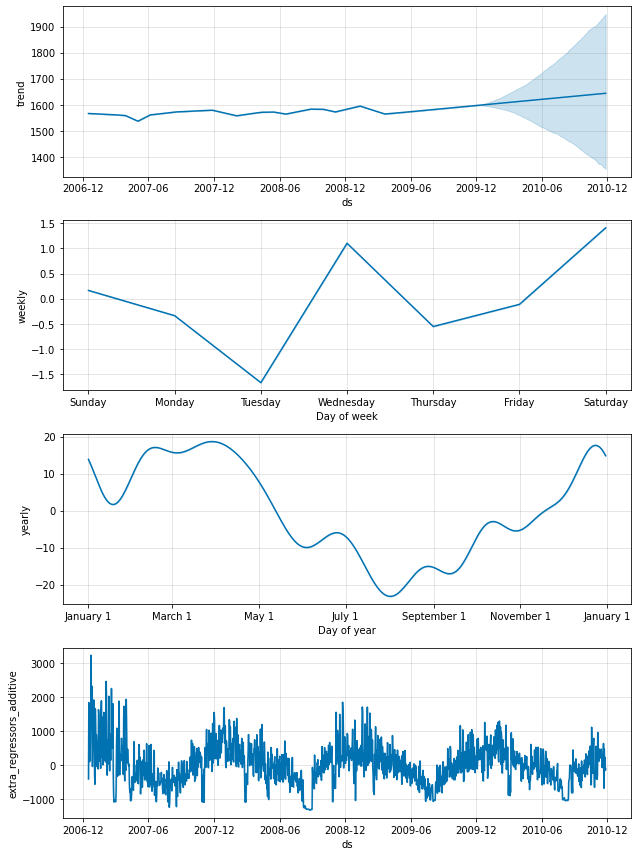

In [118]:
# plotting the components
model2.plot_components(forecast2)
plt.show()

###As seen in the component plot above, Tuesday has the least value for daily seasonality